In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('Dimensions_MAT_2002.csv')

In [7]:
data.replace('?',np.nan,inplace=True)
data = data.astype({"Dimension1":np.float64,"Dimension2":np.float64,"Dimension3":np.float64,"Dimension4":np.float64,"Dimension5":np.float64,"Dimension6":np.float64})

<AxesSubplot:xlabel='Closest Text Type', ylabel='Dimension5'>

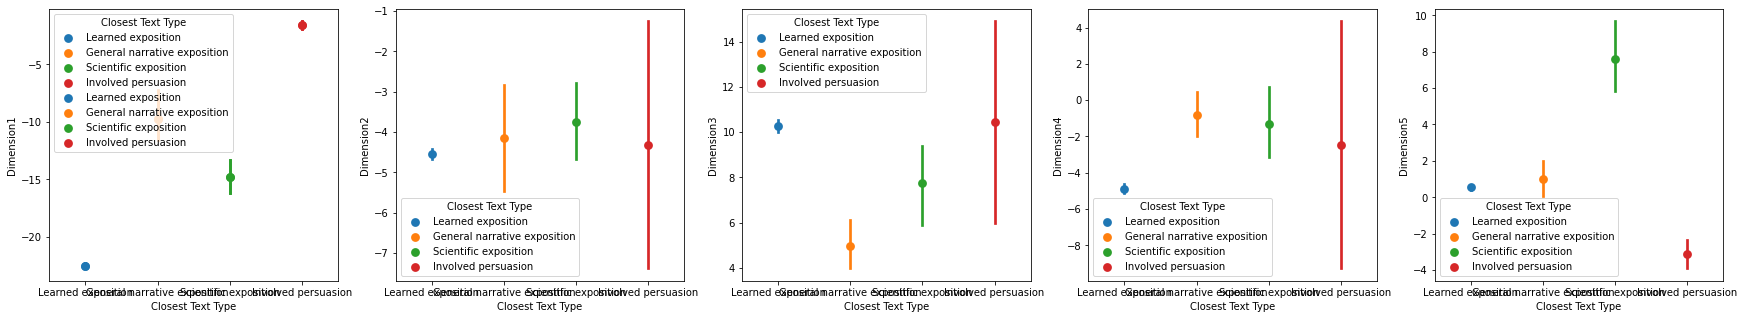

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=5,figsize=(30,5))
sns.pointplot(x="Closest Text Type", y="Dimension1", hue="Closest Text Type", data =data,ax=axs[0])
sns.pointplot(x="Closest Text Type", y="Dimension2", hue="Closest Text Type", data =data,ax=axs[1])
sns.pointplot(x="Closest Text Type", y="Dimension3", hue="Closest Text Type", data =data,ax=axs[2])
sns.pointplot(x="Closest Text Type", y="Dimension1", hue="Closest Text Type", data =data,ax=axs[0])
sns.pointplot(x="Closest Text Type", y="Dimension4", hue="Closest Text Type", data =data,ax=axs[3])
sns.pointplot(x="Closest Text Type", y="Dimension5", hue="Closest Text Type", data =data,ax=axs[4])

In [9]:
data.corr().abs()[["Dimension1"]]

,Dimension1
Dimension1,1.000000
Dimension2,0.361818
Dimension3,0.086206
Dimension4,0.533466
Dimension5,0.311222
Dimension6,0.477034


In [10]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Dimension1','Dimension2','Dimension3','Dimension4','Dimension5','Dimension6']],data.Closest_Text_Type, test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [14]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,predict_test))

0.9776785714285714


In [ ]:
model.fit(X_train,y_train)
filename='export_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
load

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

In [28]:
model.add(Dense(6,kernel_initializer = 'uniform',activation='relu',input_dim=6))
model.add(Dense(6,kernel_initializer='uniform',activation = 'relu'))
model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))

In [29]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at <ipython-input-30-ade445155f68>:2) ]] [Op:__inference_train_function_661]

Function call stack:
train_function
